In [1]:
import pandas as pd

# Load the datasets
apps_df = pd.read_csv("/content/googleplaystore.csv")
reviews_df = pd.read_csv("/content/googleplaystore_user_reviews.csv")

# Display basic info and first few rows
apps_info = apps_df.info()
apps_head = apps_df.head()
reviews_info = reviews_df.info()
reviews_head = reviews_df.head()

apps_info, apps_head, reviews_info, reviews_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

(None,
                                                  App        Category  Rating  \
 0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
 1                                Coloring book moana  ART_AND_DESIGN     3.9   
 2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
 3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
 4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
 
   Reviews  Size     Installs  Type Price Content Rating  \
 0     159   19M      10,000+  Free     0       Everyone   
 1     967   14M     500,000+  Free     0       Everyone   
 2   87510  8.7M   5,000,000+  Free     0       Everyone   
 3  215644   25M  50,000,000+  Free     0           Teen   
 4     967  2.8M     100,000+  Free     0       Everyone   
 
                       Genres      Last Updated         Current Ver  \
 0               Art & Design   January 7, 2018               1.0.0   
 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean numeric columns
apps_df_clean = apps_df.copy()

# Convert 'Reviews' to numeric
apps_df_clean['Reviews'] = pd.to_numeric(apps_df_clean['Reviews'], errors='coerce')

# Remove '+' and ',' from 'Installs', then convert to numeric
apps_df_clean['Installs'] = apps_df_clean['Installs'].str.replace('[+,]', '', regex=True)
apps_df_clean['Installs'] = pd.to_numeric(apps_df_clean['Installs'], errors='coerce')

# Remove '$' from 'Price', then convert to numeric
apps_df_clean['Price'] = apps_df_clean['Price'].str.replace('$', '', regex=False)
apps_df_clean['Price'] = pd.to_numeric(apps_df_clean['Price'], errors='coerce')

# Drop rows with missing values in key columns
apps_df_clean = apps_df_clean.dropna(subset=['Rating', 'Reviews', 'Installs', 'Price'])

# Set up visualization style
sns.set(style="whitegrid")

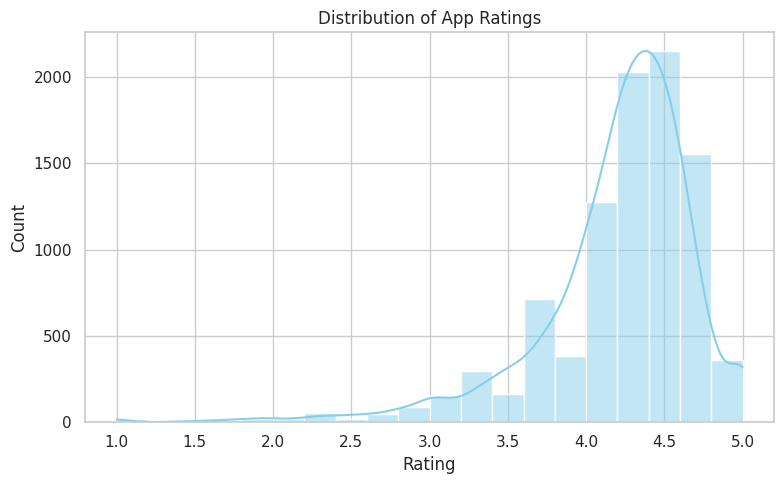

In [3]:
# Plot 1: Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(apps_df_clean['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-4-f209db577307>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


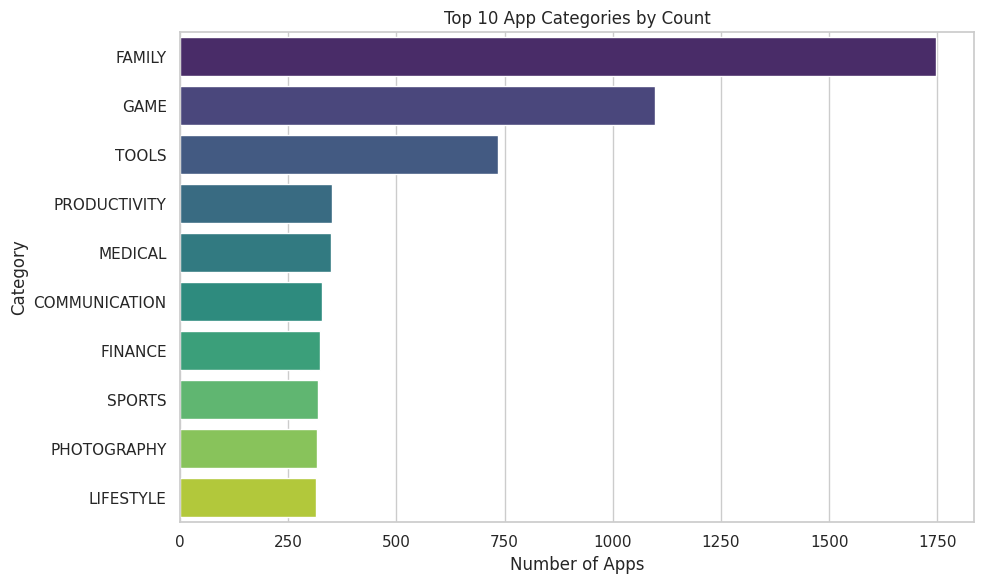

In [4]:
# Plot 2: Top 10 Categories by Number of Apps
top_categories = apps_df_clean['Category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

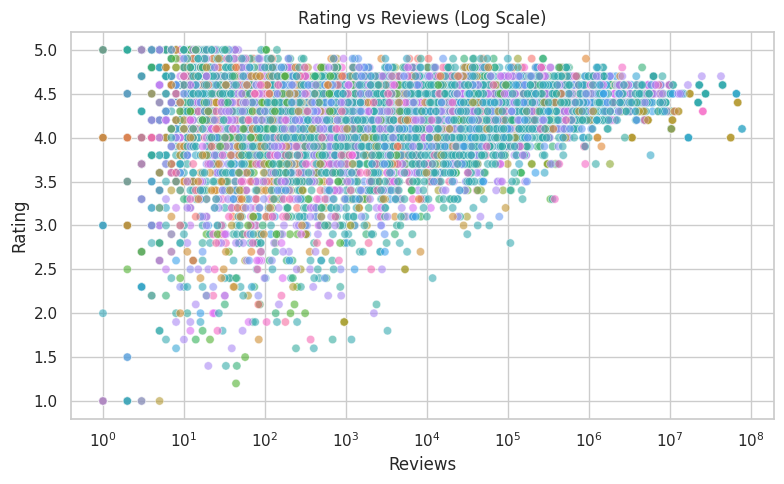

In [5]:
# Plot 3: Rating vs Reviews (log scale)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=apps_df_clean, x='Reviews', y='Rating', hue='Category', legend=False, alpha=0.6)
plt.xscale('log')
plt.title('Rating vs Reviews (Log Scale)')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

<ipython-input-6-e3b025fbe087>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.index, y=avg_sentiment['Sentiment_Polarity'], palette='coolwarm')


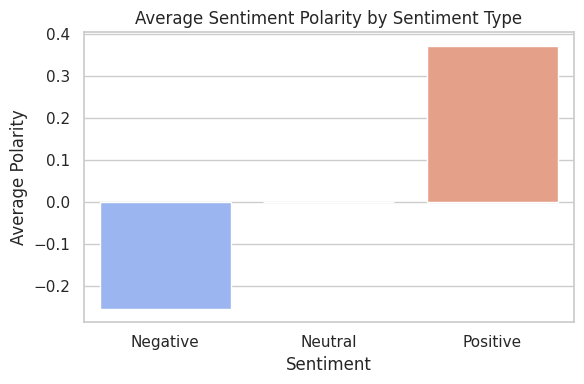

In [6]:
# Plot 4: Average Sentiment Polarity by Sentiment
avg_sentiment = reviews_df.groupby('Sentiment')[['Sentiment_Polarity']].mean().dropna()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_sentiment.index, y=avg_sentiment['Sentiment_Polarity'], palette='coolwarm')
plt.title('Average Sentiment Polarity by Sentiment Type')
plt.xlabel('Sentiment')
plt.ylabel('Average Polarity')
plt.tight_layout()
plt.show()

<ipython-input-7-a108e0ba7678>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Installs', data=apps_df_clean, palette='Set2')


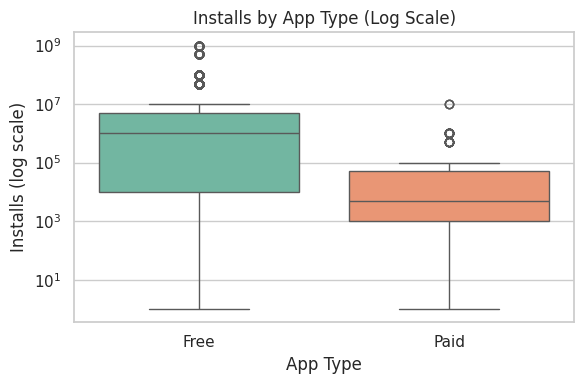

In [7]:
# Plot 5: Installs by App Type (Free vs Paid)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Installs', data=apps_df_clean, palette='Set2')
plt.yscale('log')
plt.title('Installs by App Type (Log Scale)')
plt.xlabel('App Type')
plt.ylabel('Installs (log scale)')
plt.tight_layout()
plt.show()

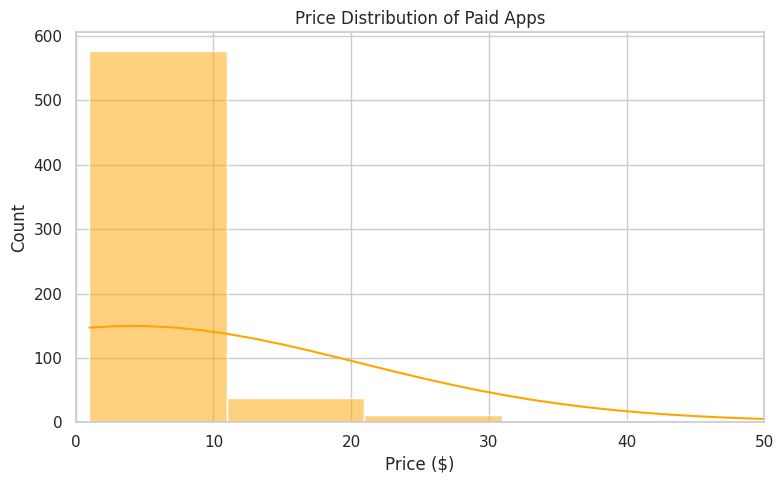

In [8]:
# Plot 6: Price Distribution of Paid Apps
paid_apps = apps_df_clean[apps_df_clean['Type'] == 'Paid']
plt.figure(figsize=(8, 5))
sns.histplot(paid_apps['Price'], bins=40, kde=True, color='orange')
plt.xlim(0, 50)  # Limit to $50 to avoid long tail
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-9-b0a4fba0b44c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='App', data=top_reviewed, palette='magma')


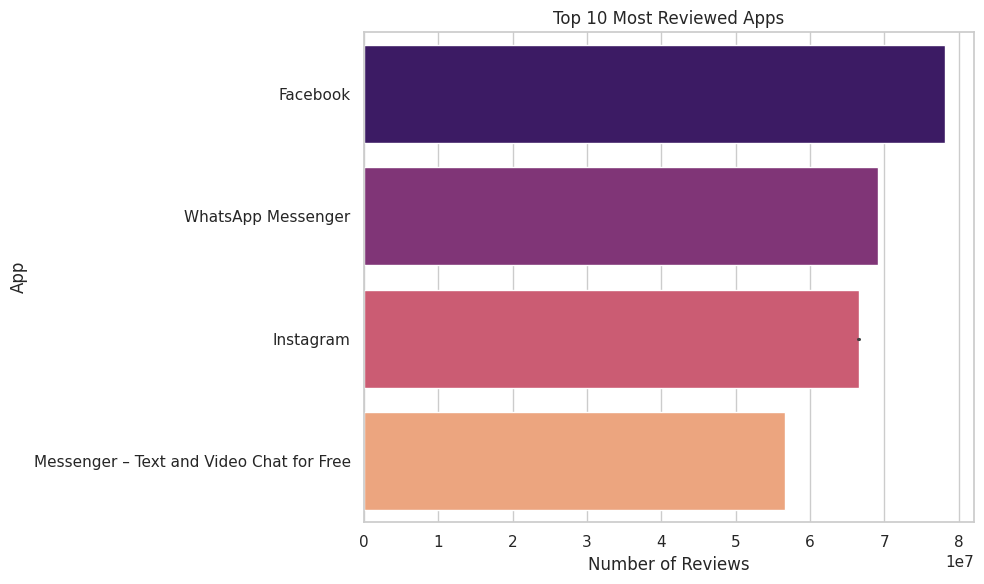

In [9]:
# Plot 7: Top 10 Apps by Number of Reviews
top_reviewed = apps_df_clean.sort_values('Reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='App', data=top_reviewed, palette='magma')
plt.title('Top 10 Most Reviewed Apps')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.tight_layout()
plt.show()

<ipython-input-10-bd9afad8e58a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=reviews_df, palette='pastel')


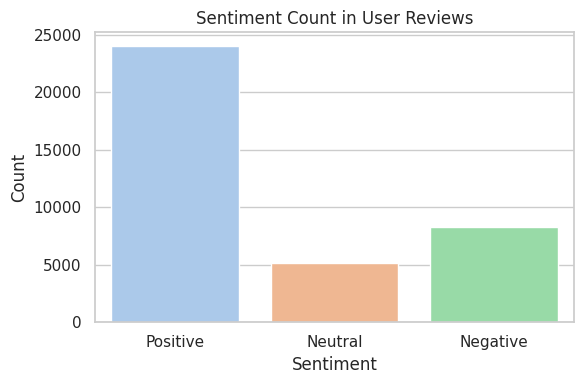

In [10]:
# Plot 8: Sentiment Count in Reviews
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=reviews_df, palette='pastel')
plt.title('Sentiment Count in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-11-a888ede0d7ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_cat.values, y=avg_rating_by_cat.index, palette='crest')


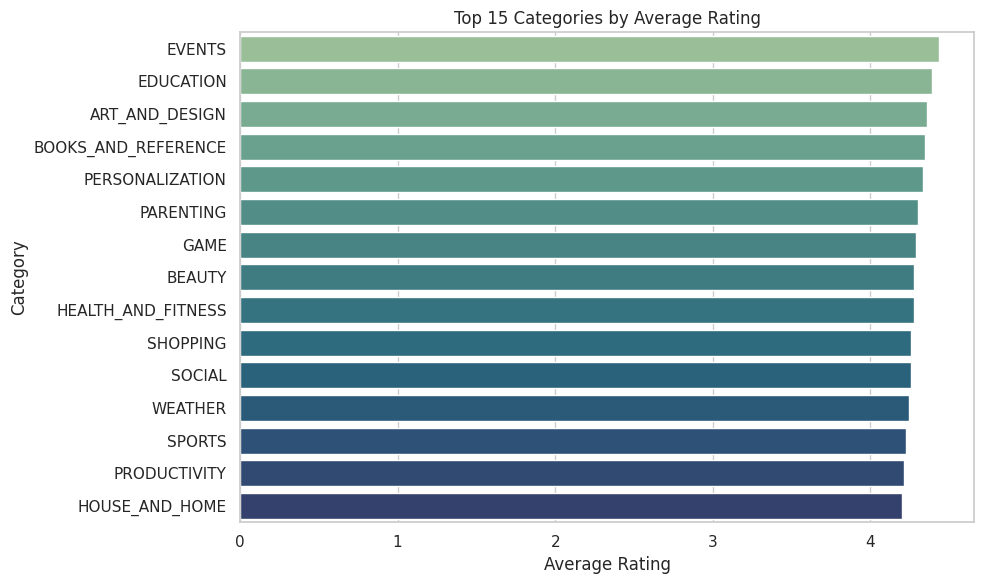

In [11]:
# Plot 9: Average Rating by App Category (Top 15)
avg_rating_by_cat = apps_df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_cat.values, y=avg_rating_by_cat.index, palette='crest')
plt.title('Top 15 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

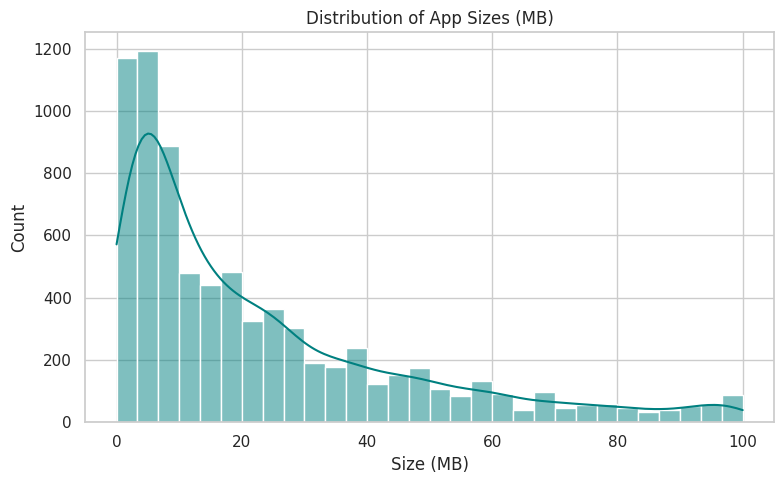

In [12]:
# Plot 10: Distribution of App Sizes (in MB, excluding "Varies with device")
# Convert 'Size' to numeric MB
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None

apps_df_clean['Size_MB'] = apps_df_clean['Size'].apply(convert_size)
plt.figure(figsize=(8, 5))
sns.histplot(apps_df_clean['Size_MB'].dropna(), bins=30, color='teal', kde=True)
plt.title('Distribution of App Sizes (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-13-91e6045c19a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_content.values, y=avg_rating_by_content.index, palette='flare')


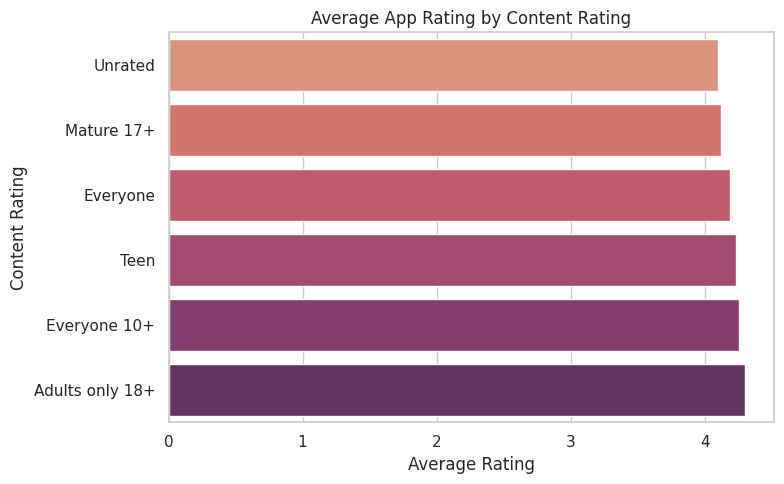

In [13]:
# Plot 11: Average Rating by Content Rating
avg_rating_by_content = apps_df_clean.groupby('Content Rating')['Rating'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_content.values, y=avg_rating_by_content.index, palette='flare')
plt.title('Average App Rating by Content Rating')
plt.xlabel('Average Rating')
plt.ylabel('Content Rating')
plt.tight_layout()
plt.show()

<ipython-input-14-346c0fe2d727>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_android_versions.values, y=top_android_versions.index, palette='ch:s=.25,rot=-.25')


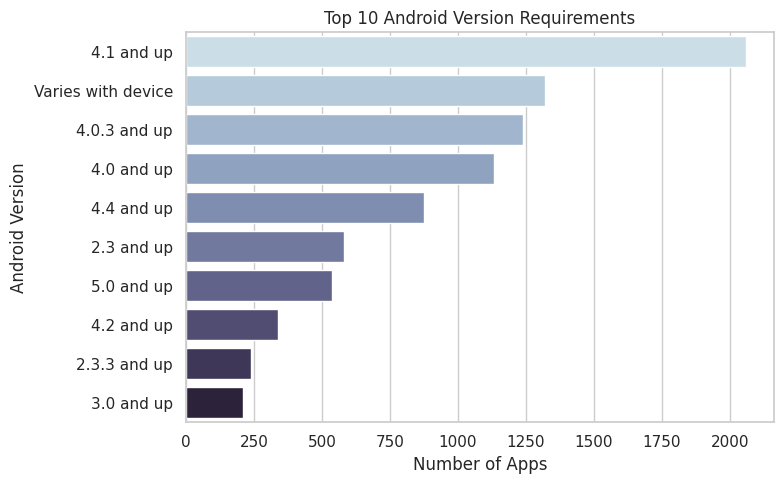

In [14]:
# Plot 12: Count of Apps by Android Version Requirement (Top 10)
top_android_versions = apps_df_clean['Android Ver'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_android_versions.values, y=top_android_versions.index, palette='ch:s=.25,rot=-.25')
plt.title('Top 10 Android Version Requirements')
plt.xlabel('Number of Apps')
plt.ylabel('Android Version')
plt.tight_layout()
plt.show()